# 示例：KNN约会网站

---

Created on 2019-06-04

Update on 2019-06-04

Coder: 6+x

Github: https://github.com/Jiachengciel/ML-in-Action

---

分成三种类型的人：

1. 不喜欢的人  (1)
2. 魅力一般的人 (2)
3. 极具魅力的人 (3)

样本包含三种特征:

1. 每年获得的飞行常客里程数
2. 玩视频游戏所耗时间百分比
3. 每周消费的冰淇淋的公升数


### 导入所需功能包

In [1]:
import operator
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib notebook
pylab.rcParams['figure.figsize'] = (5, 5)
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus']=False

#coding:utf-8

### 定义KNN算法

In [2]:
def classify0(inX, dataset, labels, k):
    '''
    KNN 算法：
    给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，
    这K个实例的多数属于某个类，就把该输入实例分类到这个类中
    
    Args:
        inX: 输入向量
        dataset: 训练数据集
        labels: 标签向量
        k: 选择最近邻居个数
    '''
    
    # 欧几里得距离
    dist = np.sqrt(np.sum(np.power(inX - dataset, 2), axis=1))
    # 将各距离从小到大排列
    sortedDistIndices = dist.argsort()
    # 选取最近的k个实例
    k_labels = [labels[indice] for indice in sortedDistIndices[0:k]]
    # 将输入向量归属于出现次数最多的类
    label = collections.Counter(k_labels).most_common(1)[0][0]
    
    return label

### 从文本中解析数据

In [3]:
def file2matrix(filename):
    '''
    将文本字符串文件导入为矩阵格式
    
    Args:
        filename: 文件名称
    Returns:
        returnMat: 返回特征矩阵
        classLabelVector: 对应标签向量
    '''
    fr = open(filename)
    arrayLines = fr.readlines()
    # 得到文件行数
    numberOfLines = len(arrayLines)
    # 创建numpy矩阵（3个特征）
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    
    for line in arrayLines:
        # strip() 方法用于移除字符串头尾指定的字符
        #（默认为空格或换行符）或字符序列
        line = line.strip()
        # 通过制表符分割字符串
        listFromLine = line.split('\t')
        # 读取每行的字符串，导入矩阵
        returnMat[index, :] = listFromLine[0:3]
        # 读取每行最后一个数，存入list，表征喜欢程度
        classLabelVector.append(int(listFromLine[-1]))
        # 进入下一行
        index += 1
        
    return returnMat, classLabelVector

In [4]:
# 查看文件
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

In [5]:
datingDataMat[:5]

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       [7.5136000e+04, 1.3147394e+01, 4.2896400e-01],
       [3.8344000e+04, 1.6697880e+00, 1.3429600e-01]])

In [6]:
datingLabels[:5]

[3, 2, 1, 1, 1]

### 绘制散点图

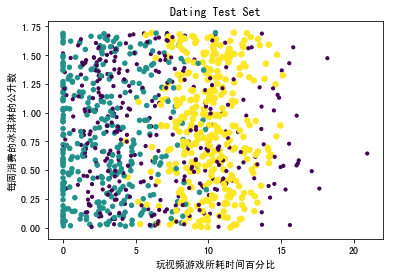

<Figure size 1800x1440 with 0 Axes>

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Dating Test Set")
ax.scatter(datingDataMat[:,1], datingDataMat[:,2],
           10*np.array(datingLabels), 10*np.array(datingLabels))
ax.set_xlabel('玩视频游戏所耗时间百分比')
ax.set_ylabel('每周消费的冰淇淋的公升数')
plt.figure(figsize=(25,20))
plt.show()